In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv(r"C:\Users\10726055\Downloads\XYZ_sales_data.csv")
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12-04-2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,02-04-2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,02-04-2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,04-03-2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [44]:
df=df[['Customer_Age','Product_Category']]
data_encoded=pd.get_dummies(df,columns=['Customer_Age','Product_Category'])
print(data_encoded)

scalar=StandardScaler()
data_scaled=scalar.fit_transform(data_encoded)
#print(data_scalad)
Kmeans=KMeans(n_clusters=3)
df['Cluster']=Kmeans.fit_predict(data_scaled)

        Customer_Age_17  Customer_Age_18  Customer_Age_19  Customer_Age_20  \
0                 False            False             True            False   
1                 False            False             True            False   
2                 False            False            False            False   
3                 False            False            False            False   
4                 False            False            False            False   
...                 ...              ...              ...              ...   
113031            False            False            False            False   
113032            False             True            False            False   
113033            False             True            False            False   
113034            False            False            False            False   
113035            False            False            False            False   

        Customer_Age_21  Customer_Age_22  Customer_Age_23  Cust

C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10726055\AppData\Local\Temp\ipykernel_13356\1835478795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=Kmeans.fit_predict(data_scaled)


C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

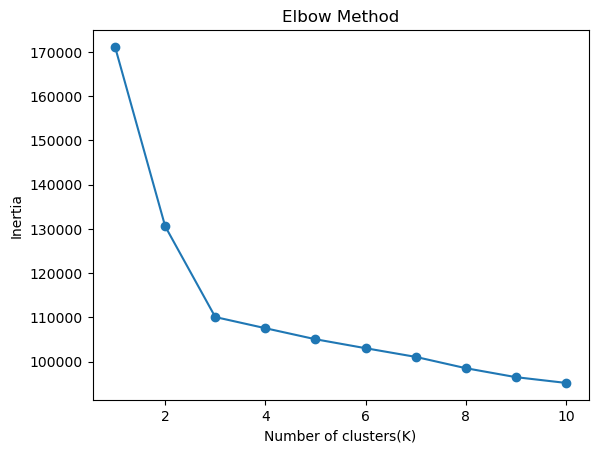

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia=[]
for k in range(1,11):
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(data_encoded)
    inertia.append(Kmeans.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

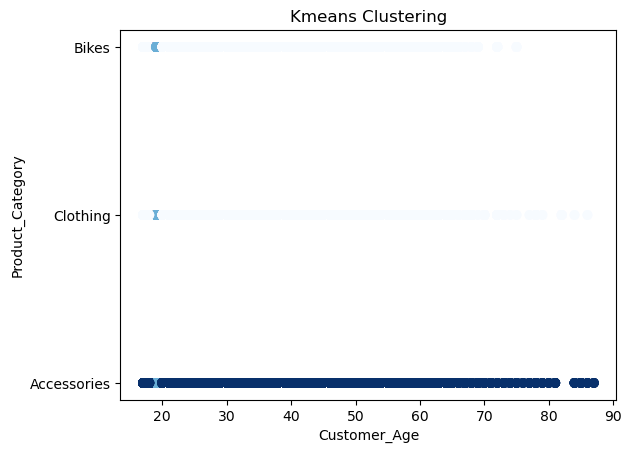

In [53]:
plt.scatter(df['Customer_Age'],df['Product_Category'],c=df['Cluster'],cmap='Blues')
plt.xlabel('Customer_Age')
plt.ylabel('Product_Category')
plt.title('Kmeans Clustering')
plt.show()


In [47]:
cd=df.groupby('Cluster')
for i in cd:
    print(i)

(0,         Customer_Age Product_Category  Cluster
16924             32         Clothing        0
16925             32         Clothing        0
16926             51         Clothing        0
16927             51         Clothing        0
16928             51         Clothing        0
...              ...              ...      ...
113031            41         Clothing        0
113032            18         Clothing        0
113033            18         Clothing        0
113034            37         Clothing        0
113035            37         Clothing        0

[42180 rows x 3 columns])
(1,         Customer_Age Product_Category  Cluster
0                 19      Accessories        1
1                 19      Accessories        1
62                19      Accessories        1
63                19      Accessories        1
362               19      Accessories        1
...              ...              ...      ...
112429            19         Clothing        1
112864            19     